In [1]:
import sys, os
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import ttest_ind_from_stats
from scipy.spatial import distance
import random
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt

In [2]:
K = [2, 4, 8, 16, 32]
data1 = pd.read_csv('digits-embedding.csv', header=None)

In [3]:
d2 = [2, 4, 6, 7]
d3 = [6, 7]
data2 = data1[data1[1].isin(d2)]
data3= data1[data1[1].isin(d3)]

In [4]:
def kmeans(data, K, seed):
    np.random.seed(seed)
    N = len(data)
    label = [0 for i in range(len(data))]
    count = 0
    centroid_idx = np.random.randint(0, N, size=K)
    centroid = []
    for i in centroid_idx:
        centroid.append((data.iloc[i][2], data.iloc[i][3]))
    while True:
        update = 0
        x = [0.0 for i in range(K)]
        y = [0.0 for i in range(K)]
        label_count = [0 for i in range(K)]
        idx = 0
        for index, row in data.iterrows():
            # print index, row[2], row[3]
            coor = (row[2], row[3])
            candidate_label = []
            for c in centroid:
                candidate_label.append(distance.euclidean(coor, c))
            # Get the label of the current point
            l = candidate_label.index(min(candidate_label))
            x[l] += row[2]
            y[l] += row[3]
            label_count[l] += 1
            
            # Check if there's an update in each round
            if l != label[idx]:
                label[idx] = l
                update += 1
            
            idx += 1
                
        count += 1
        
        if count == 50 or update == 0:
            break
        
        # Update the centroid if they does not meet the stop criterion
        for i in range(len(centroid)):
            if label_count[i] > 0:
                centroid[i] = (1.0 * x[i]/label_count[i], 1.0 * y[i]/label_count[i])
        
        print count, update
    
    return label, centroid

In [5]:
def get_stat(data, centroid, label, K):
    N = len(data)
    WC_SSD = 0
    S = []
    d = data.iloc[:,2:4]
    data_matrix = np.array(d)
    count = 0
    for index, row in data.iterrows():
        # Update the WC_SSD
        WC_SSD += np.square(distance.euclidean((row[2], row[3]), centroid[label[count]]))
        # Update the SC
        idx = [i for i in range(N) if label[i] == label[count]]
        #print idx
        SC_A = np.sum(np.sqrt(np.sum(np.square(data_matrix[idx,:] - data_matrix[count,:]), axis = 1)))
        SC_B = np.sum(np.sqrt(np.sum(np.square(data_matrix - data_matrix[count,:]), axis = 1))) - SC_A
        SC_A /= len(idx) - 1
        SC_B /= N - len(idx)
        S.append((SC_B-SC_A)/max(SC_A, SC_B))
        count += 1
    SC = np.sum(S)/len(S)
    print 'WC_SSD:', '%.2f' % WC_SSD
    print 'SC:', '%.2f' % SC
    return WC_SSD, SC

In [6]:
# Initial the centroid
# label_1 = {}
# label_2 = {}
# label_3 = {}

# centroid_1 = {}
# centroid_2 = {}
# centroid_3 = {}

WC_SSD_1 = {}
WC_SSD_2 = {}
WC_SSD_3 = {}

SC_1 = {}
SC_2 = {}
SC_3 = {}

for k in K:
    WC_SSD_1[k] = []
    WC_SSD_2[k] = []
    WC_SSD_3[k] = []

    SC_1[k] = []
    SC_2[k] = []
    SC_3[k] = []
    for s in range(10):
        print "K =", k
        # Dataset 1
        label_1, centroid_1 = kmeans(data1, k, s)
        WC_SSD, SC = get_stat(data1, centroid_1, label_1, k)
        WC_SSD_1[k].append(WC_SSD)
        SC_1[k].append(SC)
        # Dataset 2
        label_2, centroid_2 = kmeans(data2, k, s)
        WC_SSD, SC = get_stat(data2, centroid_2, label_2, k)
        WC_SSD_2[k].append(WC_SSD)
        SC_2[k].append(SC)
        # Dataset 3
        label_3, centroid_3 = kmeans(data3, k, s)
        WC_SSD, SC = get_stat(data3, centroid_3, label_3, k)
        WC_SSD_3[k].append(WC_SSD)
        SC_3[k].append(SC)
    
print WC_SSD_1
print SC_1
print WC_SSD_2
print SC_2
print WC_SSD_3
print SC_3

K = 2
1 17750
2 3287
3 2163
4 1068
5 579
6 408
7 329
8 209
9 133
10 100
11 61
12 34
13 18
14 14
15 13
16 17
17 17
18 13
19 16
20 14
21 7
22 8
23 6
24 3
25 1
26 1
WC_SSD: 8983900.00
SC: 0.37
1 3929
2 65
WC_SSD: 4211155.69
SC: 0.49
1 2097
2 4
WC_SSD: 340372.42
SC: 0.82
K = 2
1 8246
2 733
3 518
4 358
5 180
6 85
7 29
8 18
9 14
10 15
11 15
12 14
13 15
14 14
15 12
16 8
17 7
18 5
19 2
20 1
WC_SSD: 8983900.00
SC: 0.37
1 1982
2 11
WC_SSD: 4510451.35
SC: 0.51
1 2101
WC_SSD: 340372.42
SC: 0.82
K = 2
1 10455
2 318
3 155
4 59
5 30
6 15
7 18
8 15
9 17
10 12
11 9
12 8
13 5
14 2
15 1
WC_SSD: 8983900.00
SC: 0.37
1 3829
2 245
3 16
WC_SSD: 4211155.69
SC: 0.49
1 1970
2 7
WC_SSD: 340372.42
SC: 0.82
K = 2
1 5892
2 1716
3 1188
4 786
5 533
6 377
7 183
8 90
9 51
10 31
11 34
12 27
13 22
14 27
15 25
16 37
17 51
18 44
19 46
20 42
21 43
22 35
23 16
24 12
25 7
26 7
27 4
28 1
WC_SSD: 8983224.04
SC: 0.37
1 3055
2 896
3 135
4 4
WC_SSD: 4211155.69
SC: 0.49
1 1039
2 922
3 2
WC_SSD: 340372.42
SC: 0.82
K = 2
1 8723
2 631


2 683
3 478
4 385
5 264
6 152
7 108
8 105
9 92
10 67
11 42
12 24
13 23
14 10
15 8
16 5
17 1
WC_SSD: 91182.47
SC: 0.87
K = 8
1 18001
2 2968
3 2098
4 1680
5 1246
6 999
7 922
8 874
9 736
10 589
11 456
12 413
13 416
14 446
15 362
16 378
17 455
18 447
19 448
20 408
21 366
22 314
23 241
24 208
25 199
26 200
27 193
28 194
29 193
30 203
31 199
32 217
33 194
34 152
35 145
36 120
37 115
38 101
39 88
40 70
41 59
42 49
43 46
44 40
45 50
46 36
47 30
48 24
49 17
WC_SSD: 1887847.04
SC: 0.67
1 6851
2 769
3 321
4 366
5 397
6 310
7 266
8 262
9 197
10 134
11 81
12 38
13 21
14 10
15 4
16 4
17 3
18 2
19 1
20 2
21 2
22 3
23 4
24 1
25 3
WC_SSD: 385617.23
SC: 0.82
1 3919
2 610
3 640
4 298
5 116
6 56
7 29
8 15
9 14
10 8
11 11
12 7
13 9
14 5
15 4
16 5
17 5
18 5
19 8
20 8
21 11
22 3
23 7
24 6
25 7
26 4
27 2
28 3
29 2
30 2
WC_SSD: 109994.67
SC: 0.86
K = 8
1 14327
2 2908
3 2076
4 1526
5 1340
6 850
7 531
8 456
9 396
10 360
11 352
12 424
13 457
14 509
15 515
16 541
17 465
18 395
19 321
20 259
21 194
22 117
23 102
24

19 38
20 55
21 52
22 54
23 61
24 56
25 50
26 59
27 67
28 67
29 68
30 54
31 41
32 33
33 33
34 31
35 33
36 51
37 40
38 32
39 36
40 33
41 25
42 16
43 10
44 12
45 14
46 18
47 21
48 23
49 24
WC_SSD: 47377.39
SC: 0.90
K = 16
1 19066
2 2877
3 1814
4 1475
5 1304
6 901
7 526
8 364
9 267
10 223
11 183
12 127
13 135
14 144
15 191
16 214
17 221
18 235
19 248
20 212
21 183
22 133
23 125
24 103
25 104
26 106
27 101
28 115
29 129
30 128
31 107
32 98
33 84
34 55
35 37
36 39
37 45
38 55
39 60
40 41
41 37
42 24
43 22
44 20
45 13
46 8
47 7
48 7
49 3
WC_SSD: 848317.82
SC: 0.78
1 7214
2 1087
3 571
4 346
5 254
6 205
7 147
8 142
9 118
10 83
11 69
12 72
13 65
14 61
15 49
16 31
17 18
18 15
19 7
20 3
21 1
22 1
23 1
WC_SSD: 162623.30
SC: 0.87
1 3926
2 476
3 281
4 248
5 196
6 166
7 118
8 106
9 92
10 80
11 72
12 62
13 54
14 51
15 37
16 37
17 36
18 32
19 22
20 24
21 32
22 27
23 21
24 10
25 8
26 6
27 7
28 3
WC_SSD: 55810.02
SC: 0.90
K = 16
1 18566
2 2485
3 1126
4 849
5 763
6 695
7 657
8 607
9 533
10 373
11 286
12 25

20 30
21 31
22 31
23 30
24 20
25 22
26 32
27 23
28 15
29 17
30 26
31 24
32 24
33 21
34 21
35 32
36 38
37 25
38 17
39 12
40 8
41 6
42 5
43 3
44 2
45 1
46 2
47 4
48 3
49 6
WC_SSD: 24797.07
SC: 0.93
K = 32
1 19532
2 2952
3 1614
4 1203
5 1009
6 804
7 647
8 555
9 407
10 365
11 352
12 328
13 267
14 313
15 322
16 320
17 353
18 387
19 368
20 285
21 255
22 249
23 294
24 298
25 223
26 218
27 183
28 160
29 119
30 93
31 95
32 71
33 77
34 77
35 89
36 77
37 82
38 98
39 111
40 111
41 94
42 82
43 75
44 48
45 33
46 35
47 32
48 35
49 39
WC_SSD: 399855.87
SC: 0.84
1 7640
2 1175
3 638
4 434
5 317
6 256
7 260
8 232
9 193
10 152
11 126
12 111
13 91
14 88
15 65
16 51
17 50
18 39
19 41
20 55
21 65
22 79
23 68
24 54
25 36
26 26
27 20
28 8
29 7
30 6
31 1
32 1
33 2
34 1
WC_SSD: 87237.83
SC: 0.90
1 3984
2 559
3 272
4 183
5 165
6 153
7 147
8 120
9 125
10 120
11 120
12 93
13 83
14 51
15 44
16 36
17 36
18 23
19 22
20 17
21 17
22 20
23 21
24 22
25 21
26 14
27 13
28 13
29 8
30 6
31 10
32 5
33 4
34 1
WC_SSD: 26270.90
S

[2.069233904300116e-05, 0.0011398496548959832, 0.0006518663241584313, 0.0007069683022630357, 0.0006526665583243384]


<Figure size 5760x2880 with 0 Axes>

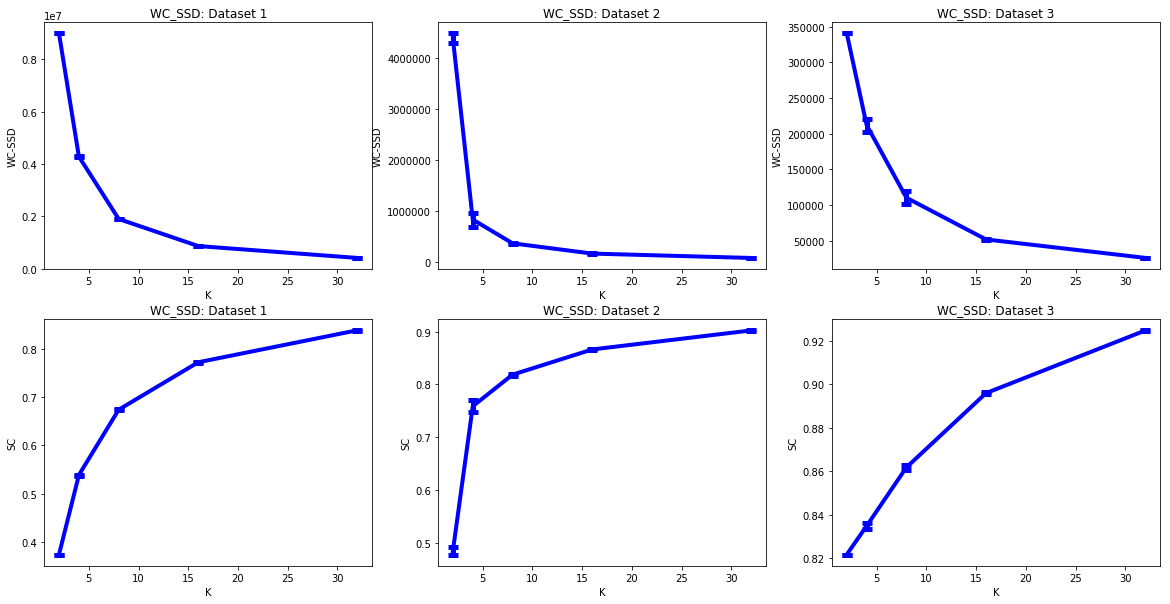

In [33]:
plt.figure(figsize=(80,40))
linestyle = {"linestyle":"-", "linewidth":4, "markeredgewidth":5, "elinewidth":5, "capsize":5}
f, axarr = plt.subplots(2, 3, figsize=(20,10))
#WC_SSD for data1
WC_SSD_1_mean = []
WC_SSD_1_stdrr = []
for k in K:
    WC_SSD_1_mean.append(np.mean(WC_SSD_1[k], axis = 0))
    WC_SSD_1_stdrr.append(np.std(WC_SSD_1[k], axis = 0)/np.sqrt(10))   
#axarr[0, 0].plot(K, WC_SSD_1_mean, marker='.',color = 'b')
axarr[0, 0].errorbar(K, WC_SSD_1_mean, WC_SSD_1_stdrr, color = 'b', **linestyle)
axarr[0, 0].set_title('WC_SSD: Dataset 1')
axarr[0, 0].set_xlabel('K')
axarr[0, 0].set_ylabel('WC-SSD')

#WC_SSD for data1
WC_SSD_2_mean = []
WC_SSD_2_stdrr = []
for k in K:
    WC_SSD_2_mean.append(np.mean(WC_SSD_2[k], axis = 0))
    WC_SSD_2_stdrr.append(np.std(WC_SSD_2[k], axis = 0)/np.sqrt(10))
#axarr[0, 1].plot(K, WC_SSD_2_mean, marker='.',color = 'b')
axarr[0, 1].errorbar(K, WC_SSD_2_mean, WC_SSD_2_stdrr, color='b', **linestyle)
axarr[0, 1].set_title('WC_SSD: Dataset 2')
axarr[0, 1].set_xlabel('K')
axarr[0, 1].set_ylabel('WC-SSD')

#WC_SSD for data1
WC_SSD_3_mean = []
WC_SSD_3_stdrr = []
for k in K:
    WC_SSD_3_mean.append(np.mean(WC_SSD_3[k], axis = 0))
    WC_SSD_3_stdrr.append(np.std(WC_SSD_3[k], axis = 0)/np.sqrt(10))
#axarr[0, 2].plot(K, WC_SSD_3_mean, marker='.',color = 'b')
axarr[0, 2].errorbar(K, WC_SSD_3_mean, WC_SSD_3_stdrr, color='b', **linestyle)
axarr[0, 2].set_title('WC_SSD: Dataset 3')
axarr[0, 2].set_xlabel('K')
axarr[0, 2].set_ylabel('WC-SSD')

#WC_SSD for data1
SC_1_mean = []
SC_1_stdrr = []
for k in K:
    SC_1_mean.append(np.mean(SC_1[k], axis = 0))
    SC_1_stdrr.append(np.std(SC_1[k], axis = 0)/np.sqrt(10))
#axarr[1, 0].plot(K, SC_1_mean, marker='.',color = 'b')
axarr[1, 0].errorbar(K, SC_1_mean, SC_1_stdrr, color='b', **linestyle)
axarr[1, 0].set_title('WC_SSD: Dataset 1')
axarr[1, 0].set_xlabel('K')
axarr[1, 0].set_ylabel('SC')

#WC_SSD for data1
SC_2_mean = []
SC_2_stdrr = []
for k in K:
    SC_2_mean.append(np.mean(SC_2[k], axis = 0))
    SC_2_stdrr.append(np.std(SC_2[k], axis = 0)/np.sqrt(10))
#axarr[1, 1].plot(K, SC_2_mean, marker='.',color = 'b')
axarr[1, 1].errorbar(K, SC_2_mean, SC_2_stdrr, color='b', **linestyle)
axarr[1, 1].set_title('WC_SSD: Dataset 2')
axarr[1, 1].set_xlabel('K')
axarr[1, 1].set_ylabel('SC')

#WC_SSD for data1
SC_3_mean = []
SC_3_stdrr = []
for k in K:
    SC_3_mean.append(np.mean(SC_3[k], axis = 0))
    SC_3_stdrr.append(np.std(SC_3[k], axis = 0)/np.sqrt(10))
#axarr[1, 2].plot(K, SC_3_mean, marker='.',color = 'b')
axarr[1, 2].errorbar(K, SC_3_mean, SC_3_stdrr, color='b', **linestyle)
axarr[1, 2].set_title('WC_SSD: Dataset 3')
axarr[1, 2].set_xlabel('K')
axarr[1, 2].set_ylabel('SC')
print SC_1_stdrr

# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.2, wspace = 0.2)
plt.savefig('./figs/2_3.png')